In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, foldnorm

In [2]:
def plot_ellipse(mean, covariance, n_std=2, ax=None, **kwargs):
    """
    평균과 공분산 행렬을 사용하여 타원을 그립니다.

    Parameters:
    - mean: 1x2 배열, 타원의 중심 (평균 벡터)
    - covariance: 2x2 배열, 공분산 행렬
    - n_std: float, 타원의 크기를 결정하는 표준편차의 배수 (기본값: 2)
    - ax: matplotlib 축 객체 (기본값: None)
    - kwargs: matplotlib.patches.Ellipse에 전달할 추가 스타일 인수

    Returns:
    - 타원을 그린 matplotlib Ellipse 객체
    """
    from matplotlib.patches import Ellipse
    if ax is None:
        ax = plt.gca()

    # 공분산 행렬의 고유값과 고유벡터 계산
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)

    # 고유값의 제곱근으로 타원의 축 길이 결정
    axis_length = n_std * np.sqrt(eigenvalues)

    # 고유벡터에서 타원의 회전 각도 계산
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    # 타원 생성
    ellipse = Ellipse(
        xy=mean,
        width=2 * axis_length[0],
        height=2 * axis_length[1],
        angle=angle,
        **kwargs
    )

    # 타원을 플롯에 추가
    ax.add_patch(ellipse)

    return ellipse

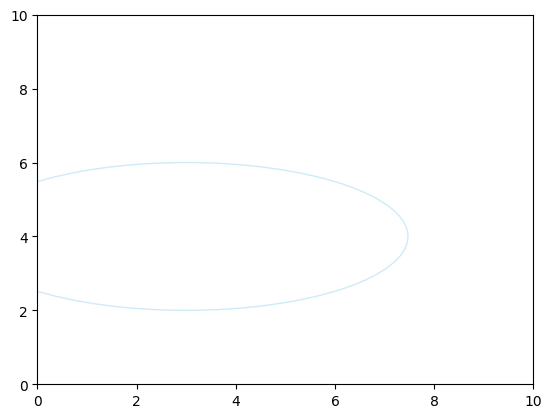

In [7]:
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
for 
    
    mu = [mu_x, mu_y]
    Sigma = [
        [sigma_x, 0],
        [0, sigma_y]
    ]
    plot_ellipse(mu, Sigma, n_std=2, ax=ax, color='skyblue', fill=False, alpha=0.4)

In [60]:
mu_x_list = np.linspace(14, 18, 100)
mu_y_list = np.linspace(11, 16, 100)

sigma_x_list = np.linspace(0.4, 1, 100)
sigma_y_list = np.linspace(0.9, 3, 100)

In [61]:
mu_x_samples = np.random.uniform(14, 18, 100)
mu_y_samples = np.random.uniform(11, 16, 100)

sigma_x_samples = np.random.uniform(0.4, 1, 100)
sigma_y_samples = np.random.uniform(0.9, 3, 100)

mu_samples = np.stack([mu_x_samples, mu_y_samples])

z = np.zeros_like(sigma_x_samples)
Sigma = np.stack([sigma_x_samples, z, z, sigma_y_samples])
Sigma_samples = Sigma.reshape(2,2,-1)

In [75]:
from ipywidgets import interact, IntSlider
R = 12
for fig_idx, theta in enumerate(range(360)):
    theta = theta / 180 * np.pi
    point = [R * np.cos(theta) + 15, R * np.sin(theta) + 15]

    fig, ax = plt.subplots(1,3,figsize=(12, 4))

    # x CVaR fill
    mu_x_grid, sigma_x_grid = np.meshgrid(mu_x_list, sigma_x_list)
    params = np.stack([mu_x_grid.flatten(), sigma_x_grid.flatten()])

    x_CVaR_values = np.zeros([100, 100]).flatten()

    for idx, (mu, sigma) in enumerate(params.T):
        diff_mu = abs(mu - point[0])
        diff_sigma = sigma
        d_dist = foldnorm(diff_mu / diff_sigma, scale=diff_sigma)
        mean, std = d_dist.stats()
        epsilon = 0.1
        kappa = np.sqrt(epsilon / (1-epsilon))
        CVaR = -mean + kappa * std
        x_CVaR_values[idx] = CVaR
    
    x_CVaR_values = x_CVaR_values.reshape(100, 100)
    highlight_mu_x, highlight_sigma_x = params[:,x_CVaR_values.argmax()]

    # y CVaR fill
    mu_y_grid, sigma_y_grid = np.meshgrid(mu_y_list, sigma_y_list)
    params = np.stack([mu_y_grid.flatten(), sigma_y_grid.flatten()])

    y_CVaR_values = np.zeros([100, 100]).flatten()

    for idx, (mu, sigma) in enumerate(params.T):
        diff_mu = abs(mu - point[1])
        diff_sigma = sigma
        d_dist = foldnorm(diff_mu / diff_sigma, scale=diff_sigma)
        mean, std = d_dist.stats()
        epsilon = 0.1
        kappa = np.sqrt(epsilon / (1-epsilon))
        CVaR = -mean + kappa * std
        y_CVaR_values[idx] = CVaR
       
    y_CVaR_values = y_CVaR_values.reshape(100, 100)
    highlight_mu_y, highlight_sigma_y = params[:,y_CVaR_values.argmax()]
    
    mu = [highlight_mu_x, highlight_mu_y]
    Sigma = [
        [highlight_sigma_x, 0],
        [0, highlight_sigma_y]
    ]
    plot_ellipse(mu, Sigma, n_std=2, ax=ax[0], color='blue', fill=False)

    
    
    
    
    cax = ax[1].imshow(x_CVaR_values)
    ax[1].invert_yaxis()
    ax[1].set_title('x axis ambiguity set')
    ax[1].axis('off')
    fig.colorbar(cax)
    
    cax = ax[2].imshow(y_CVaR_values)
    ax[2].invert_yaxis()
    ax[2].set_title('y axis ambiguity set')
    ax[2].axis('off')
    fig.colorbar(cax)
    
    ax[0].set_xlim(0, 30)
    ax[0].set_ylim(0, 30)
    
    for mu, Sigma in zip(mu_samples.T, Sigma_samples.T):
        plot_ellipse(mu, Sigma, n_std=2, ax=ax[0], color='skyblue', fill=False, alpha=0.4)
    ax[0].scatter(*point)
    ax[0].set_title('Ego position and obstacle distribution')
    plt.savefig(f'heatmap_record/{fig_idx}.png')
    plt.close()